In [2]:
# importing the libraries required
import pandas as pd
import warnings
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
pwd

'C:\\Users\\SAI SATHVIK'

In [4]:
# importing the first csv file
df = pd.read_csv('INvideos.csv',encoding='utf-8')

In [5]:
# we need to print the first 5 data for the csv file
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [6]:
# to show number of rows and columns
df.shape

(37352, 16)

In [7]:
# TO DESCRIBE ALL THE ATTRIBUTES IN THE LOG FORMAT
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


In [8]:
# to remove the likes and views in higher order for e^n
df['log_views'] = np.log(df['views'])
# df['log_likes'] = np.log(df['likes'])

In [9]:
# importing the bokeh libaries that are useful to complete the dataplotting
from bokeh.plotting import figure , output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

In [10]:
# showing the bokeh circle using the comment count and the likes count and the source is dataframe which we extracted
fig = figure()
p = fig.circle(x = 'likes', y = 'comment_count', source = df)

In [11]:
#### showing the figure usibng the bokeh mode
show(fig)

# outlier detection using the percentile and quantile

In [12]:

max_threshold = df['likes'].quantile(0.96)
max_threshold

158879.0

In [13]:
df[df['likes'] > max_threshold]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views
17,ePO5M5DE01I,17.14.11,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,2017-11-07T06:01:50.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",35885754,829362,61195,101117,https://i.ytimg.com/vi/ePO5M5DE01I/default.jpg,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,17.395851
90,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634126,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,17.327761
262,ePO5M5DE01I,17.15.11,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,2017-11-07T06:01:50.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",37533416,853550,62858,102740,https://i.ytimg.com/vi/ePO5M5DE01I/default.jpg,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,17.440742
377,2Vv-BfVoq4g,17.15.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",39082222,1721384,23137,90352,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,17.481178
545,ePO5M5DE01I,17.16.11,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,2017-11-07T06:01:50.000Z,"Tiger Zinda Hai Trailer|""Tiger Zinda Hai Offic...",38664360,865914,63908,103907,https://i.ytimg.com/vi/ePO5M5DE01I/default.jpg,False,False,False,Stay updated! 🔔 Subscribe Now: https://goo.gl/...,17.470429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37303,PjTU0DmBWiU,18.14.06,PRADA - JASS MANAK (Official Video) Satti Dhil...,Geet MP3,24,2018-06-13T12:30:01.000Z,"prada|""prada song video""|""prada full song""|""pr...",3233766,279457,3762,30611,https://i.ytimg.com/vi/PjTU0DmBWiU/default.jpg,False,False,False,Geet MP3 & GK.DIGITAL Presenting Official Musi...,14.989158
37304,Zqv5CBWt9yA,18.14.06,Bhuvan Bam- Safar | Official Music Video |,BB Ki Vines,24,2018-06-13T07:13:43.000Z,"safar|""travel""|""bhuvan bam""|""music""|""journey""|...",3854712,524135,14650,55735,https://i.ytimg.com/vi/Zqv5CBWt9yA/default.jpg,False,False,False,Bhuvan Bam releases his 3rd single 'Safar' in ...,15.164807
37305,c7MwlTFQBEQ,18.14.06,Soorma | Official Trailer | Diljit Dosanjh | T...,Sony Pictures Networks Productions,24,2018-06-11T05:25:40.000Z,"Soorma Official Trailer|""Soorma""|""Diljit Dosan...",6725073,242373,3569,14606,https://i.ytimg.com/vi/c7MwlTFQBEQ/default.jpg,False,False,False,Here's presenting the official trailer for the...,15.721353
37308,BAp-LNDkGOg,18.14.06,Bollywood Vs Reality | Harsh Beniwal,Harsh Beniwal,23,2018-06-11T14:17:18.000Z,"harsh beniwal|""harsh beniwal new video""|""harsh...",3315697,322915,10068,28008,https://i.ytimg.com/vi/BAp-LNDkGOg/default.jpg,False,False,False,Hey Everyone Check the latest Bollywood vs rea...,15.014178


In [14]:
min_threshold = df['likes'].quantile(0.40)
min_threshold

1879.0

In [15]:
df[df['likes'] > min_threshold]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,13.907476
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,13.068937
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,14.032781
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,15.624892
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,15.559264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,5gd1G0aeqtw,18.14.06,If everything on the internet was true | Comed...,Dreamz Unlimited,24,2018-06-13T15:33:32.000Z,"nagaland|""northeast""|""facebook""|""whatsapp""|""so...",56313,6687,57,556,https://i.ytimg.com/vi/5gd1G0aeqtw/default.jpg,False,False,False,Believing everything you see and hear on the i...,10.938681
37345,tR5FZC2FP-U,18.14.06,"Priyamanaval Episode 1040, 13/06/18",VikatanTV,43,2018-06-13T17:00:04.000Z,"priyamanaval episode 1040|""Priyamanaval 13.06....",535254,3105,1403,898,https://i.ytimg.com/vi/tR5FZC2FP-U/default.jpg,False,False,False,Priyamanaval Episode 1040Subscribe: https://go...,13.190497
37346,8aMckaI9k00,18.14.06,Indore Preview- Chacha Vidhayak Hai Humare - Z...,Zakir Khan,22,2018-06-13T14:18:31.000Z,[none],274861,16448,183,834,https://i.ytimg.com/vi/8aMckaI9k00/default.jpg,False,False,False,"Suno, Sab sort karva denge. Chacha vidhayak ha...",12.524021
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,12.275496


# Extracting the final dataset using the outlier detection

In [16]:
df = df[(df['likes']<max_threshold) & (df['likes'] > min_threshold)]
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,13.907476
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,13.068937
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,14.032781
5,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,15.624892
6,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,15.559264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37344,5gd1G0aeqtw,18.14.06,If everything on the internet was true | Comed...,Dreamz Unlimited,24,2018-06-13T15:33:32.000Z,"nagaland|""northeast""|""facebook""|""whatsapp""|""so...",56313,6687,57,556,https://i.ytimg.com/vi/5gd1G0aeqtw/default.jpg,False,False,False,Believing everything you see and hear on the i...,10.938681
37345,tR5FZC2FP-U,18.14.06,"Priyamanaval Episode 1040, 13/06/18",VikatanTV,43,2018-06-13T17:00:04.000Z,"priyamanaval episode 1040|""Priyamanaval 13.06....",535254,3105,1403,898,https://i.ytimg.com/vi/tR5FZC2FP-U/default.jpg,False,False,False,Priyamanaval Episode 1040Subscribe: https://go...,13.190497
37346,8aMckaI9k00,18.14.06,Indore Preview- Chacha Vidhayak Hai Humare - Z...,Zakir Khan,22,2018-06-13T14:18:31.000Z,[none],274861,16448,183,834,https://i.ytimg.com/vi/8aMckaI9k00/default.jpg,False,False,False,"Suno, Sab sort karva denge. Chacha vidhayak ha...",12.524021
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,12.275496


In [17]:
# to remove the likes and views in higher order for e^n
df['log_views'] = np.log(df['views'])
df['log_likes'] = np.log(df['likes'])

In [18]:
# For hovering over information

TOOLTIPS = [
    ("Title", "@title"),
    ("Channel","@channelTitle"),
    ("Views", "@view_count")
]

fig1 = figure(tooltips = TOOLTIPS)
p = fig1.circle(x='log_views', y= 'log_likes',source = df)

# adding axis labels and coloring the graph plots
fig1.xaxis.axis_label = 'Likes'
fig1.yaxis.axis_label = 'Views'
glyph = p.glyph
glyph.size = 15
glyph.fill_alpha = 0.3
glyph.fill_color = "green"
glyph.line_color = "grey"
glyph.line_dash = [6, 3]
glyph.line_width = 2

# glyphs are the data points where it is plotted on the graph to understand what video has what trending update. 

In [19]:
show(fig1)

# category id grouping

In [20]:
df.groupby('category_id').count()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes
category_id,,,,,,,,,,,,,,,,,
1,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1226,1220,1226,1226
2,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41
10,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047,3047
17,501,501,501,501,501,501,501,501,501,501,501,501,501,501,495,501,501
19,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
20,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
22,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1196,1171,1196,1196
23,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2790,2810,2810
24,8083,8083,8083,8083,8083,8083,8083,8083,8083,8083,8083,8083,8083,8083,7993,8083,8083


In [21]:
# ID -> Category Name
# 1 --> Film and animation
# 2 --> Autos and vehicles
# 10 --> Music
# 15 --> Pets and Animals
# 17 --> Sports
# 19 --> Travel and Events
# 20 --> Gaming
# 22 --> People and Blogs
# 23 --> Comedy
# 24 --> Entertainment
# 25 --> News and politics
# 26 --> How to style
# 27 --> Education
# 28 --> Science and Technology
# 29 --> Non-profits and Activism

 # Here we have the entertainment category as the highest view count and next the music category so we will create other dataframe for it and sort it by view count.

In [22]:
entertainment = df[df['category_id'] == 24]

In [23]:
entertainment.sort_values('views', ascending=False)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,log_views,log_likes
1861,coOKvrsmQiI,17.23.11,RAMPAGE - OFFICIAL TRAILER 1 [HD],Warner Bros. Pictures,24,2017-11-16T21:15:08.000Z,"Rampage|""Rampage the Movie""|""The Rock""|""Dwayne...",16199598,149353,13055,26336,https://i.ytimg.com/vi/coOKvrsmQiI/default.jpg,False,False,False,"In Theaters April 20, 2018\n\nwww.RampageTheMo...",16.600497,11.914068
3781,sXAwqoJ-WUA,17.03.12,"LIE (2017) Full Movie in Hindi | Nithiin, Arju...",RKD Digital,24,2017-11-25T20:06:32.000Z,"lie full movie in hindi|""lie 2017 hindi dubbed...",16151630,82998,7852,4120,https://i.ytimg.com/vi/sXAwqoJ-WUA/default.jpg,False,False,False,The wait is finally over! LIE - One of the mos...,16.597532,11.326572
1721,coOKvrsmQiI,17.22.11,RAMPAGE - OFFICIAL TRAILER 1 [HD],Warner Bros. Pictures,24,2017-11-16T21:15:08.000Z,"Rampage|""Rampage the Movie""|""The Rock""|""Dwayne...",15104666,143947,12709,25593,https://i.ytimg.com/vi/coOKvrsmQiI/default.jpg,False,False,False,"In Theaters April 20, 2018\n\nwww.RampageTheMo...",16.530514,11.877200
1606,coOKvrsmQiI,17.22.11,RAMPAGE - OFFICIAL TRAILER 1 [HD],Warner Bros. Pictures,24,2017-11-16T21:15:08.000Z,"Rampage|""Rampage the Movie""|""The Rock""|""Dwayne...",15104666,143947,12709,25593,https://i.ytimg.com/vi/coOKvrsmQiI/default.jpg,False,False,False,"In Theaters April 20, 2018\n\nwww.RampageTheMo...",16.530514,11.877200
3552,sXAwqoJ-WUA,17.02.12,"LIE (2017) Full Movie in Hindi | Nithiin, Arju...",RKD Digital,24,2017-11-25T20:06:32.000Z,"lie full movie in hindi|""lie 2017 hindi dubbed...",14723564,78373,7278,4080,https://i.ytimg.com/vi/sXAwqoJ-WUA/default.jpg,False,False,False,The wait is finally over! LIE - One of the mos...,16.504960,11.269235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34060,kPFF4iYp0iI,18.27.05,TYPES OF INDIAN SINGERS !,Love Rudrakash,24,2018-05-26T14:05:03.000Z,"Types of singer|""types of funny songs""|""funny ...",30832,3013,321,512,https://i.ytimg.com/vi/kPFF4iYp0iI/default.jpg,False,False,False,Hello Guys You Must Have Seen Amazing Singer b...,10.336308,8.010692
36946,59daH3-_LIg,18.12.06,LOVE AATA | CAPDT,CAPDT,24,2018-06-11T12:29:18.000Z,"capdt|""capdt facebook""|""capdt latest video""|""l...",30244,2624,59,393,https://i.ytimg.com/vi/59daH3-_LIg/default.jpg,False,False,False,Here is our latest video Love ఆట Directed by S...,10.317053,7.872455
1445,dh2IPikoM7k,17.21.11,Condom | Comedy | Message,Dreamz Unlimited,24,2017-11-20T13:08:54.000Z,"condom|""ad""|""dreamzunlimited""|""comedy""|""nagala...",29665,2234,16,156,https://i.ytimg.com/vi/dh2IPikoM7k/default.jpg,False,False,False,With new cases of AIDs numbers skyrocketing in...,10.297723,7.711549
11059,8YW59mzQY3Q,18.13.01,Routes of Transmission | Awareness | Dreamz Un...,Dreamz Unlimited,24,2018-01-12T13:59:33.000Z,"hiv|""aids""|""condom""|""naga""|""nagaland""|""nsacs""|...",22955,1886,18,113,https://i.ytimg.com/vi/8YW59mzQY3Q/default.jpg,False,False,False,AIDS is not a virus but a set of symptoms (or ...,10.041291,7.542213


In [24]:
entertainment.views.dtype

dtype('int64')

In [25]:
entertainment.describe()

,category_id,views,likes,dislikes,comment_count,log_views,log_likes
count,8083.0,8.083000e+03,8083.000000,8083.00000,8083.000000,8083.000000,8083.000000
mean,24.0,9.252312e+05,17107.396264,1255.06025,1550.966349,13.195854,9.051059
std,0.0,1.304953e+06,25358.523342,2273.91005,2656.294576,1.023201,1.103268
min,24.0,1.882400e+04,1880.000000,14.00000,0.000000,9.842888,7.539027
25%,24.0,2.765000e+05,3419.000000,307.00000,309.000000,12.529966,8.137103
50%,24.0,5.375060e+05,6711.000000,594.00000,694.000000,13.194695,8.811503
75%,24.0,1.028987e+06,17764.500000,1332.50000,1625.500000,13.844085,9.784957
max,24.0,1.619960e+07,157588.000000,43944.00000,34968.000000,16.600497,11.967739


In [26]:
pd.options.display.float_format = '{:,f}'.format
entertainment[['views','likes']].describe()

,views,likes
count,"8,083.000000","8,083.000000"
mean,"925,231.243969","17,107.396264"
std,"1,304,952.632429","25,358.523342"
min,"18,824.000000","1,880.000000"
25%,"276,500.000000","3,419.000000"
50%,"537,506.000000","6,711.000000"
75%,"1,028,987.000000","17,764.500000"
max,"16,199,598.000000","157,588.000000"


# for entertainment category to be in trending you need minimum of 18000 views and 2000 likes, and the highest is 1.6 crore views and 85k likes

In [27]:
print ("Amongst the trending entertainment videos , the lowest trending trending number of views was {}".format(min(entertainment['views'])))

Amongst the trending entertainment videos , the lowest trending trending number of views was 18824


In [28]:
print ("Amongst the trending entertainment videos , the highest trending trending number of views was {}".format(max(entertainment['views'])))

Amongst the trending entertainment videos , the highest trending trending number of views was 16199598


In [29]:
print ("Amongst the trending entertainment videos , the trending video was {}".format(max(entertainment['views'])))

Amongst the trending entertainment videos , the trending video was 16199598


C:\Users\SAISAT~1\AppData\Local\Temp/ipykernel_3440/2292556925.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment["contains_capitalised"] = entertainment["title"].apply(contains_capital)


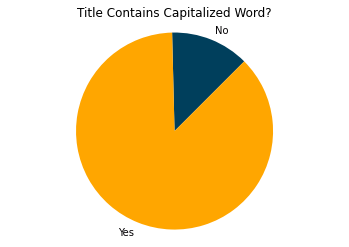

In [30]:
def contains_capital(s):
    for w in s:
        if w.isupper():
            return True
        return False

    
entertainment["contains_capitalised"] = entertainment["title"].apply(contains_capital)

value_counts = entertainment["contains_capitalised"].value_counts().to_dict()

fig2, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

# from above we can see that almost 80% of the videos has title as capital letter when it is in trending for entertainment category.

# Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

In [31]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

C:\Users\SAISAT~1\AppData\Local\Temp/ipykernel_3440/1925263200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment["title_length"] = entertainment["title"].apply(lambda x: len(x))
C:\Users\SAI SATHVIK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


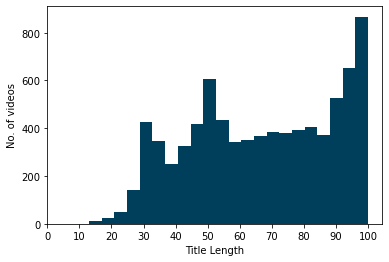

In [32]:
entertainment["title_length"] = entertainment["title"].apply(lambda x: len(x))

fig2, ax = plt.subplots()
_ = sns.distplot(entertainment["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

# From the above graph we can see that the more videos have more than or equal to atleast 100 characters to be in the trending list. 

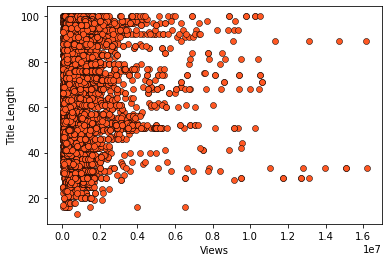

In [33]:
fig2, ax = plt.subplots()
_ = ax.scatter(x=entertainment['views'], y=entertainment['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

# from the above scatter plot we can see that there is no relationship between the length and the views, but if we look keenly there are videos which are more than 80 characters that has 160000000 views, and there are videos which have 100 characeters but still <20000 views

In [34]:
# to remove the likes and views in higher order for e^n
entertainment['log_views'] = np.log(entertainment['views'])
entertainment['log_likes'] = np.log(entertainment['likes'])

C:\Users\SAISAT~1\AppData\Local\Temp/ipykernel_3440/793671460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment['log_views'] = np.log(entertainment['views'])
C:\Users\SAISAT~1\AppData\Local\Temp/ipykernel_3440/793671460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entertainment['log_likes'] = np.log(entertainment['likes'])


In [35]:
# For hovering over information

TOOLTIPS = [
    ("Title", "@title"),
    ("Channel","@channel_title"),
    ("Views", "@views")
]

fig4 = figure(tooltips = TOOLTIPS)
p = fig4.circle(x='log_views', y= 'log_likes',source = entertainment)

# adding axis labels and coloring the graph plots
fig4.xaxis.axis_label = 'Likes'
glyph = p.glyph
glyph.size = 15
glyph.fill_alpha = 0.3
glyph.fill_color = "green"
glyph.line_color = "grey"
glyph.line_dash = [6, 3]
glyph.line_width = 2

In [36]:
show(fig4)

In [37]:
import seaborn as sns

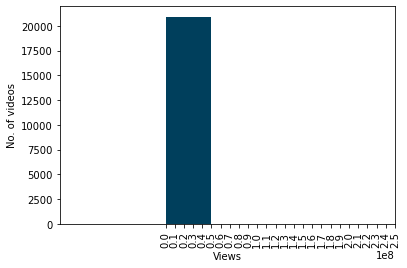

In [38]:
figg, ax = plt.subplots()
_ = sns.distplot(df["log_views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e9, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e9, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

# We note that the vast majority of trending videos have 5 million views or less. We get the 5 million number by calculating 0.1×10^8/2=5×10^6 Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data 

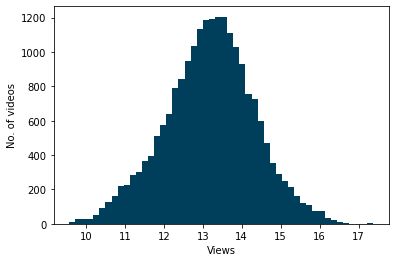

In [39]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["log_views"] < 25e6]["log_views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

# Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

In [40]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

71.1792272379495

# So, it is around 70%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 71%, and that the percentage of videos with less than 5 million views is around 80%.

# After views, we plot the histogram for likes column

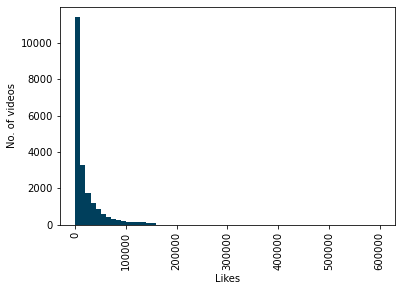

In [41]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e5, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

# We note that the vast majority of trending videos have between 0 and 100,000 likes. Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

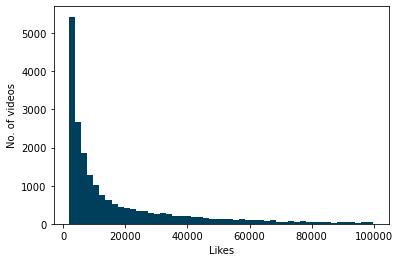

In [42]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

In [43]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

84.26740627390971

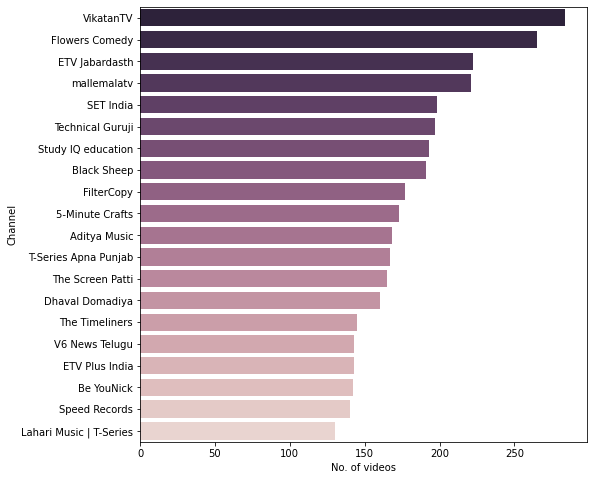

In [44]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

In [45]:
from collections import Counter

In [46]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 26838),
 ('-', 6921),
 ('2018', 3225),
 ('||', 2044),
 ('Song', 1528),
 ('The', 1459),
 ('Episode', 1417),
 ('Movie', 1328),
 ('Video', 1218),
 ('Full', 1194),
 ('&', 1054),
 ('Latest', 1031),
 ('Songs', 1015),
 ('Official', 1010),
 ('Trailer', 946),
 ('New', 909),
 ('Punjabi', 891),
 ('Telugu', 805),
 ('in', 704),
 ('2', 702),
 (':', 660),
 ('News', 633),
 ('2017', 630),
 ('of', 625),
 ('to', 593)]